# RAG - PDF using Chroma DB - LLM Model - all-MiniLM-L6-v2

In [1]:
# install the necessary packaages/modules
#!pip install langchain
#!pip install sentence-transformers 
#!pip install langchain-chroma
#!pip install langchain-community
#!pip install PyPDF2
#!pip install pymupdf
#!pip install sentence-transformers

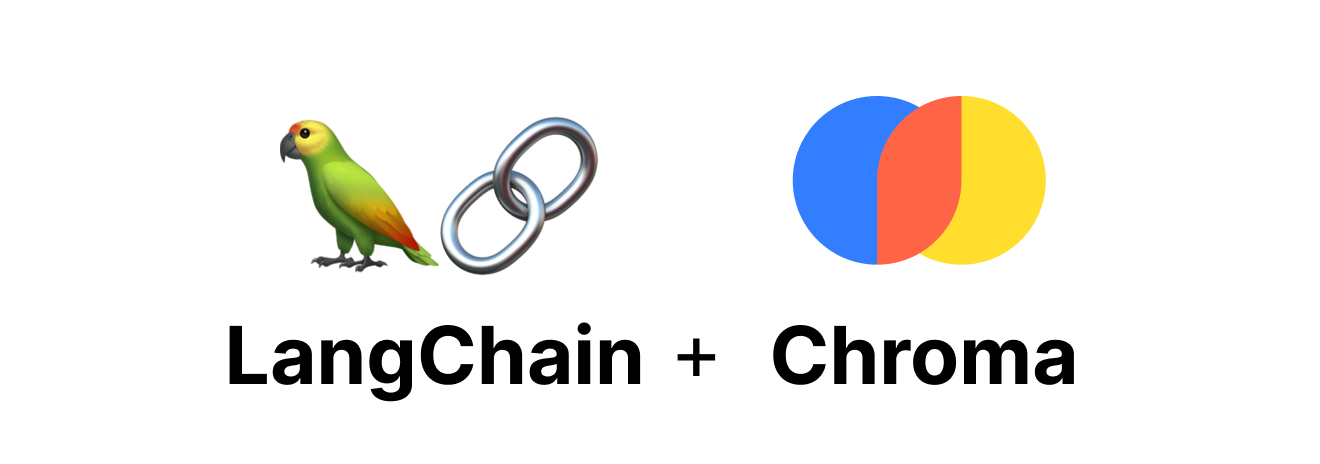

# import Packages

In [1]:
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import PDFPlumberLoader
from langchain_text_splitters import CharacterTextSplitter

# load the document and split it into chunks

In [2]:
loader = PDFPlumberLoader("ANN.pdf")
documents = loader.load()

In [3]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

In [4]:
print(len(docs))
print(docs)

4
[Document(page_content='what is Neuron - How neuron works\n1. In a single neuron two operations are performed\n2. Neuron is Linear combinations and Activations\n3. If there no activations it is simply a Linear network\n4. It will not understand and patterns, the deeper thinking is not possible\n5. In order to get the more patterns, we need to apply Non linearity\n6. This non linearity is given by activation functions\n7. The perfect example is sigmoid activation function\n8. It is look like s curve, which means it is Nonlinear curve\n9. Now it is the time, understand human brain neuron', metadata={'source': 'ANN.pdf', 'file_path': 'ANN.pdf', 'page': 1, 'total_pages': 5, 'Author': 'Alex Reddy', 'Creator': 'Microsoft® Word 2021', 'CreationDate': "D:20240502081740+05'30'", 'ModDate': "D:20240502081740+05'30'", 'Producer': 'Microsoft® Word 2021'}), Document(page_content='There are many activation functions are available\n• Sigmoid\n• SoftMax\n• Tanh\n• ReLU Rectified Linear unit\n• Leaky

# Initialize the embedding function

In [6]:
from langchain.embeddings import SentenceTransformerEmbeddings
# Initialize the embedding function
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\91956\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91956\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# load it into Chroma

In [7]:
db = Chroma.from_documents(docs, embedding_function)

# query it

In [8]:
query = "What is the meaning of neuron"
docs = db.similarity_search(query)

# Print results

In [9]:
# print results
print(docs[0].page_content)

what is Neuron - How neuron works
1. In a single neuron two operations are performed
2. Neuron is Linear combinations and Activations
3. If there no activations it is simply a Linear network
4. It will not understand and patterns, the deeper thinking is not possible
5. In order to get the more patterns, we need to apply Non linearity
6. This non linearity is given by activation functions
7. The perfect example is sigmoid activation function
8. It is look like s curve, which means it is Nonlinear curve
9. Now it is the time, understand human brain neuron
